# 5 Chaotic systems

Often models of nature have a discrete deterministic structure. A classic example is in population dynamics, where one hypothesises that the number of individuals in year $x_n$ is simply a function of the number in the previous year: $$x_{n+1}=f(x_n).$$ If $f(x)$ is linear one has the logistic equation, and the number of individuals grows exponentially. This is a reasonable model if there are infite resources no preditors. The next most sophisticated model would be to add a nonlinear term representing either the finite resources or the role of preditors. This gives the logistic map $$f(x)= 4 \mu x (1-x),$$ which is a map of the interval $(0,1)$ onto itself. There is one parameter $\mu$, which will change the behavior of the map. For example, at $\mu=1$, this function precisely folds the unit interval in half and stretches it (nonuniformly) to cover the original domain. It turns out that this simple map displays some complicated behavior.

# 5.A Iterated maps
Here you should define a set of functions to work with iterated maps and display the results.

In [1]:
"""Basic functionality for iterated maps"""
import scipy
import pylab
import numpy as np
import matplotlib.pyplot as plt

#### Exercise 5.1
Define the logistic map function.

In [2]:
def f(x, mu):
  """
  Logistic map f(x) = 4 mu x (1-x), which folds the unit interval (0,1)
  into itself.
  """
  return 4 * mu * x * (1 - x)

#### Exercise 5.2
Define a function to iterate a function g(x, mu) N-1 times, starting at x0, so that the full trajectory contains N points.


In [3]:
def IterateList(g, x0, N, mu):
  """
  Iterate the function g(x, mu) N-1 times, starting at x0, so that the
  full trajectory contains N points.
  Returns the entire list
  (x, g(x), g(g(x)), ... g(g(...(g(x))...))).

  Can be used to explore the dynamics starting from an arbitrary point
  x0, or to explore the attractor starting from a point x0 on the
  attractor (say, initialized using Iterate).

  For example, you can use Iterate to find a point xAttractor on the
  attractor and IterateList to create a long series of points attractorXs
  (thousands, or even millions long, if you're in the chaotic region),
  and then use
      pylab.hist(attractorXs, bins=500, normed=1)
      pylab.show()
  to see the density of points.
  """
  trajectory = [x0]
  x = x0

  for n in range(N - 1):
    x = g(trajectory[-1], mu)
    trajectory.append(x)

  return trajectory

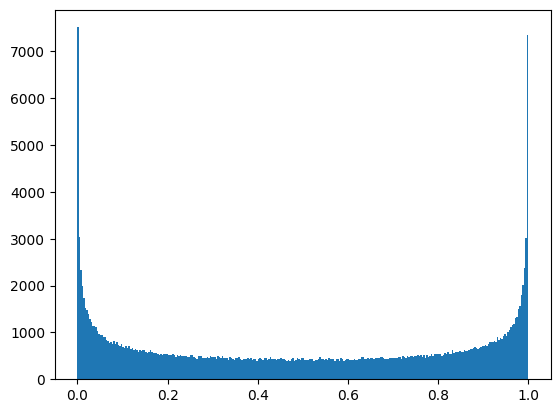

In [4]:
x0 = 0.4
mu = 1
N_traj = 200000
N_bins = 300
attractorX = IterateList(f, x0, N_traj, mu)[-1]
attractorXs = IterateList(f, attractorX, N_traj, mu)
pylab.hist(attractorXs, bins=N_bins)
pylab.show()

#### Exercise 5.3
Define a function to that for each parameter value mu in muArray, iterates g nTransient times to find a point on the attractor, and then makes a list nCycle long to explore the attractor by visualizing the results in a plot.

In [5]:
def BifurcationDiagram(g, x0, nTransient, nCycle, muArray, showPlot=True):
  """
  For each parameter value mu in muArray,
  iterate g nTransient times to find a point on the attractor, and then
  make a list nCycle long to explore the attractor.

  To generate muArray, it's convenient to use scipy.linspace: for example,
  BifurcationDiagram(f, 0.1, 500, 128, scipy.linspace(0.8, 1.0, 200))

  pylab.plot allows one to plot an entire array of abscissa-values versus an
  array of ordinate-values of the same shape. Our vertical axis (ordinate)
  is a list of arrays of attractor points of length nCycle (created by
  IterateList after Iterating), one list per value of mu in muArray.
  Our horizontal axis (abscissa) should thus be a list of arrays
      [mu, mu, mu, ...] = [mu]*nCycle = mu*scipy.ones(nCycle)
  of length nCycle.
  Use
      pylab.plot(muMatrix, xMatrix, 'k,')
      pylab.show()
  to visualize the resulting bifurcation diagram, where 'k,' denotes
  black pixels.
  """
  muMatrix = []
  xMatrix = []
  for mu in muArray:
    attractor = IterateList(g, x0, nTransient, mu)[-1]
    traj = IterateList(g, attractor, nCycle, mu)
    xMatrix.append(traj)
    muMatrix.append(mu*np.ones(nCycle))
  if showPlot:
    pylab.plot(muMatrix, xMatrix, 'k,')
    pylab.show()
  return

Play with the functions and make some plots exploring different values of the parameter $\mu$

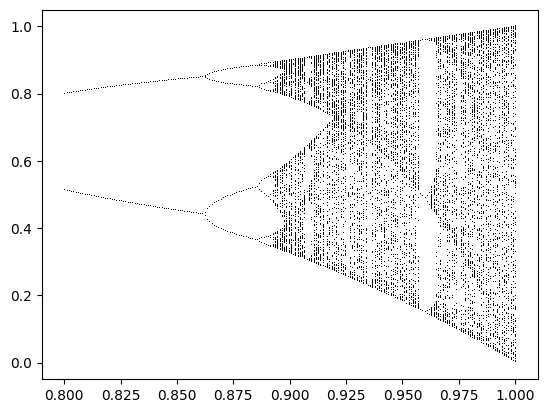

In [6]:
BifurcationDiagram(f, 0.1, 500, 128, np.linspace(0.8, 1.0, 200))

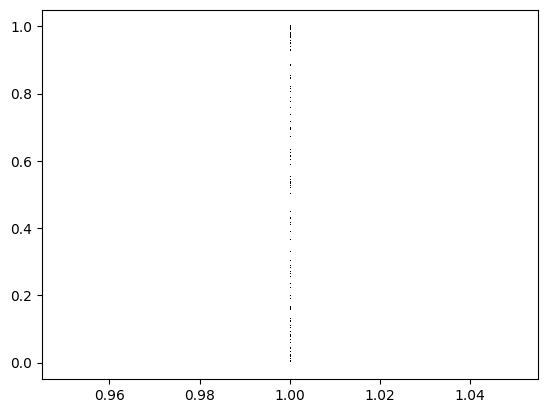

In [7]:
BifurcationDiagram(f, 0.1, 500, 128,np.linspace(1, 1, 200))

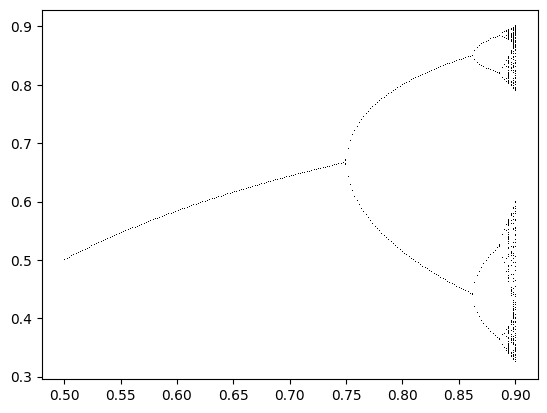

In [8]:
BifurcationDiagram(f, 0.1, 500, 128,np.linspace(0.5, 0.9, 200))

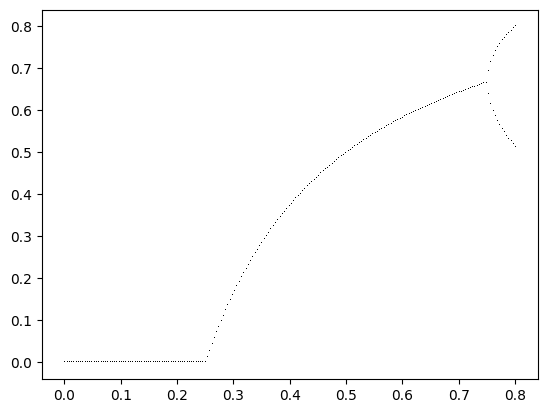

In [9]:
BifurcationDiagram(f, 0.1, 500, 128,np.linspace(0,0.8,200))

# 5.B The Lyapunov exponent
Chhaotic dynamical systems have sensitive dependence on initial conditions. This is commonly described as the "butterfly effect": the flap of a butterfly's wing in Brazil can build up to change a tornado later in Texas. In this exercise, we measure the sensitivity to initial conditions for the logistic map by introducing the Lyapunov exponent.

The mathematics community lumps together continuous dynamical evolution laws and discrete mappings as both being dynamical systems. The general stretching and folding exhibited by our map is often seen in driven physical systems without conservation laws. In this exercise, we will focus on values of $\mu$ near one, where the motion is mostly chaotic. Chaos is sometimes defined as motion where the final posi- tion depends sensitively on the initial conditions. Two trajectories, starting a distance $\epsilon$ apart, will typically drift apart in time as $e^{\lambda t}$, where $\lambda$ is the Lyapunov exponent for the chaotic dynamics.

Read first all exercises 5.4, 5.5, 5.6 and then start.


In [10]:
import scipy.optimize

#### Exercise 5.4
Write a function to calculate the difference between two trajectories that start
at two points x1 and x2, presumably close to one another. You can usefully pick x2-x1 comparable to machine precision (seventeen
digits). Don't choose x1 or x2 to equal zero or one in the logistic map: zero is an unstable fixed point.


In [11]:
def TrajectoryDifference(g, x1, x2, N, mu):
  """
  Calculates the difference between two trajectories that start
  at two points x1 and x2, presumably close to one another.
  Returns list of length N+1,
  [x2-x1, g(x2)-g(x1), g(g(x2))-g(g(x1)), ...]

  Used for illustrating sensitive dependence on initial conditions for
  chaotic regions, and for calculating Lyapunov exponents.

  You can usefully pick x2-x1 comparable to machine precision (seventeen
  digits). Don't choose x1 or x2 to equal zero or one in the logistic
  map: zero is an unstable fixed point.
  """
  g1 = np.array(IterateList(f, x1, N+1, mu))
  g2 = np.array(IterateList(f, x2, N+1, mu))

  return g2-g1

#### Exercise 5.5
Write a function to plot the absolute value of the difference of the trajectories.

In [12]:
def PlotTrajectoryDifference(g, x1, x2, N, mu):
  """
  Calls TrajectoryDifference to find the difference, then plots the
  absolute value of the difference using
      pylab.semilogy(scipy.fabs(dx)).
  (Given just one array, pylab assumes the other axis is just the
  index into the array.)

  Notice that the differences stop growing when they become of order
  one (naturally). Don't use such long trajectories to calculate the
  Lyapunov exponents: it will bias the results downward.
  """
  trajectory_difference = TrajectoryDifference(g, x1, x2, N, mu)
  pylab.semilogy(scipy.fabs(trajectory_difference))
  pylab.xlabel('Iteration')
  pylab.ylabel('Absolute Difference')
  pylab.title('Absolute Difference of Trajectories')
  pylab.show()

#### Exercise 5.6
Compute the Lyapunov exponent for the logistic function with $\mu=0.9$. To do this first define the fitting function, then a function that does the best fit and finally a function to plot the result.

Start with   $\mu= 0.9$ and two nearby points
$x_0$ and $y_0=x_0+\epsilon$   somewhere between zero and one. Investigate the two trajectories
$x_0$; $f(x_0)$; $f(f(x_0))$; .. and $y_0$; $f(y_0)$;... .
How fast do they separate? Why do they stop sep
arating? Estimate the Lyapunov exponent.


In [13]:
def LyapunovFitFunc(p, traj_diff):
  """
  Given a trajectory difference traj_diff and a tuple
      p = (lyapExponent, lyapLogPrefactor)
  returns the residuals
      log(|y_n|) - log( exp(lyapLogPrefactor + lyapExponent * n) )
    == log(|y_n|) - (lyapLogPrefactor + lyapExponent * n) (avoids overflow)

  The residual is the difference between the data and the fit:
  if the residuals were zero, the trajectory difference would be
  perfectly described as a growing exponential.
  That is, the growth of the difference between two trajectories is
  expected to be of the form
    |x_n - y_n| \sim lyapPrefactor * exp(lyapExponent n)

  We take the log of the difference so that the least--squares fit
  will emphasize the initial points and final points roughly equally.
  We use the log of the lyapPrefactor because it must be positive:
  it's a standard trick in nonlinear fitting to change variables like
  this to enforce ranges in parameters.

  Used by FitLyapunovExponent to generate a least-squares fit for
  the Lyapunov exponent and prefactor.
  """
  return scipy.log(scipy.fabs(traj_diff)) - (p[1] + p[0] * scipy.arange(len(traj_diff)))

In [14]:
def FitLyapunovExponent(traj_diff, p0=(1., -13.)):
  """
  Given a trajectory difference and an initial guess
  p0=(lyapExponent, lyapPrefactor) for the Lyapunov exponent and
  prefactor, uses scipy.optimize.leastsq to do a best fit for
  these two constants, and returns them.

  The return value will likely include a warning message, even though
  the fit seems fine and the warning meaningless. You'll likely need
  to delete it before using PlotFit.
  """
  result = scipy.optimize.leastsq(LyapunovFitFunc, p0, args=(traj_diff,))
  return result[0]

In [15]:
def PlotFit(traj_diff, p):
  """
  Given a trajectory difference and p=(lyapExponent, lyapPrefactor),
  plot |traj_diff| and the fit on a semilog y axis.
  """
  n = np.arange(len(traj_diff))
  fitted_difference = np.exp(p[1] + p[0] * n)
  pylab.semilogy(scipy.fabs(traj_diff),label='Trajectory Difference')
  pylab.semilogy(fitted_difference, label='Best Fit')
  pylab.xlabel('Iteration')
  pylab.ylabel('Absolute Trajectory Difference')
  pylab.title('Lyapunov Exponent Fit')
  pylab.legend()
  pylab.show()

Now you can wrap this up

<ipython-input-13-f899184ef193>:25: DeprecationWarning: scipy.fabs is deprecated and will be removed in SciPy 2.0.0, use numpy.fabs instead
  return scipy.log(scipy.fabs(traj_diff)) - (p[1] + p[0] * scipy.arange(len(traj_diff)))
<ipython-input-13-f899184ef193>:25: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  return scipy.log(scipy.fabs(traj_diff)) - (p[1] + p[0] * scipy.arange(len(traj_diff)))
<ipython-input-13-f899184ef193>:25: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  return scipy.log(scipy.fabs(traj_diff)) - (p[1] + p[0] * scipy.arange(len(traj_diff)))
<ipython-input-15-21f28a8e84bf>:8: DeprecationWarning: scipy.fabs is deprecated and will be removed in SciPy 2.0.0, use numpy.fabs instead
  pylab.semilogy(scipy.fabs(traj_diff),label='Trajectory Difference')


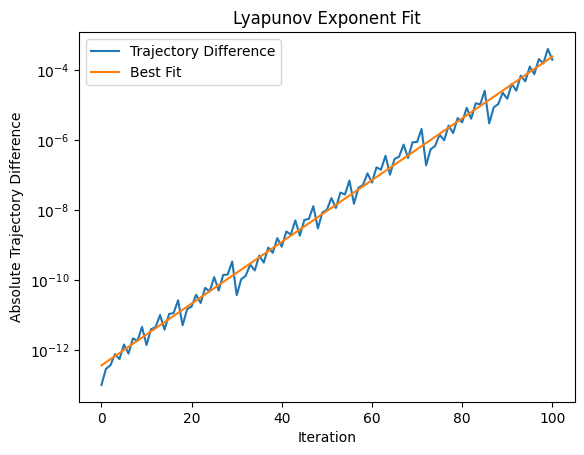

In [16]:
traj=TrajectoryDifference(f,0.1,0.1000000000001, 100, 0.9)
p = FitLyapunovExponent(traj)
PlotFit(traj, p)

# 5.C Fractal dimension
In chaotic dynamical systems, the attractor (the set of all states occupied at long times, after the transients have disappeared) is often very strange. These sets are often tenuous and jagged, with holes on all length scales. We characterize these sets with a fractal dimension. The dimensions of two extremely different sets, however, can be the same: the path exhibited by a random walk in high dimensions is two--dimensional, just like the surface of a sphere. If the fractal dimensions are different, though, the sets are different.

There is more than one way to define a dimension for a set. In the folowing exercises, you will calculate the capacity dimension (originally called the Hausdorff dimension) and the information dimension (related to the entropy). To generate our strange set, we use a system that both has a strange attractor and is at a continuous phase transition: the logistic map at the period doubling onset of chaos.

The attractor for the logistic map is a periodic orbit (dimension zero) at   $\mu= 0.8$, and a chaotic, cusped density  filling two intervals (dimension one) at
$\mu = 0.$9. At the onset of chaos at   $\mu=\mu_\infty=0.892486418$  the dimension becomes intermediate between zero and one; this strange, self-similar set is called the Feigenbaum attractor.

Both the information dimension and the capacity dimension are dfined in terms of the occupation $P_n$ of cells of size $\epsilon$ in the limit as  $\epsilon \to 0$.

Read exercises 5.7,5.8,5.9 before starting.

#### Exercise 5.7
Write a function which, given $\mu$  and a set of bin sizes $\epsilon$, does the following:
- Iterates $f(x)$ hundreds or thousands of times (to get onto the attractor).
- Iterates $f(x)$ a large number Ntot more times, collecting points on the attractor. (For $\mu<\mu_\infty$ you could just integrate $2^n$ times for n fairly large.)
- For each $\epsilon$ , use a histogram to calculate the probability $P_j[\epsilon]$ that the points fall in the jth bin.
- Return the set of vectors $P_j[\epsilon]$.

Test your function by using it for $\mu= 1$ (where the distribution should look like  $\rho(x) = 1/\pi \sqrt{x(1-x)}$,
and  $\mu= 0.8$ (where the distribution should look like two  $\delta$-functions, each with half of the points).

In [17]:
import random

In [18]:
def center_bin(bins):
  centers = []
  for i in range(len(bins)-1):
    centers.append((bins[i]+bins[i+1])/2)
  return centers

def rho(x):
    return (1 /np.pi) * (1/np.sqrt(x * (1 - x)))*0.1

def GetPn(mu, epsilonList, nSampleMax, nTransient=10000):
  """
  Generates probability arrays P_n[epsilon].
  Specifically,
  finds a point on the attractor by iterating nTransient times
  collects points on the attractor of size nSample
  for each epsilon in epsilonList,
  generates bins of size epsilon for the range (0,1) of the function
    bins = scipy.arange(0.0,1.0+eps,eps)
  finds the number of points from the sample in each bin, using
  the histogram function
    numbers, bins = pylab.mlab.hist(sample, bins=bins)
  and computes the probability P_n[epsilon] of being in each bin.
  In the period doubling region the sample should of size 2^n so that
  it covers the attractor evenly.
  """
  x0 = random.random()
  attractor = IterateList(f, x0, nTransient, mu)[-1]
  sample = np.array(IterateList(f, attractor, nSampleMax, mu))
  P_n= {}
  bins__ = {}
  length = {}
  for eps in epsilonList:
    bins = np.arange(0.0, 1.0 + eps, eps)
    numbers, bins2 = np.histogram(sample, bins=bins)
    P_n[eps] = numbers / len(sample)
    bins__[eps] = center_bin(bins2)

  return P_n, bins__

In [19]:
x_values = np.linspace(0.0001,1-0.0001, 100000)
EPSILONS = np.linspace(0.001,0.1, 10)
P_n, bins_ = GetPn(1, EPSILONS, 1000, nTransient=1000)

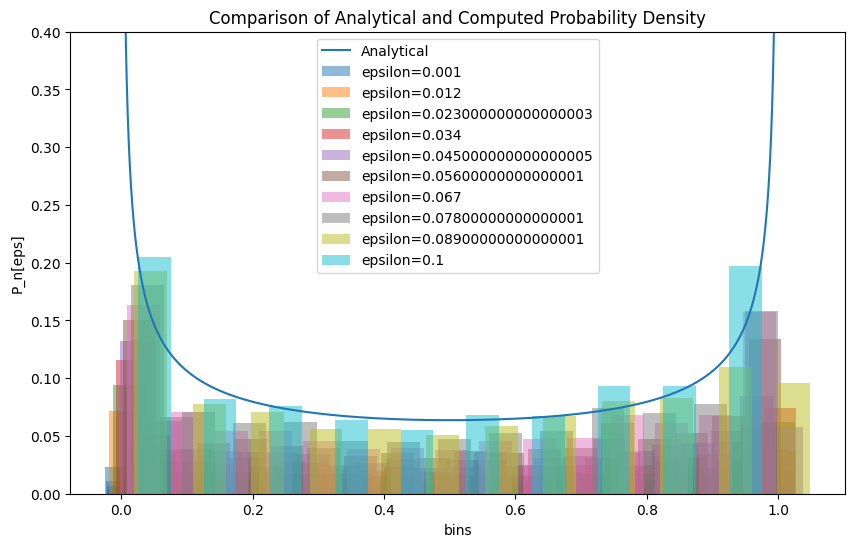

In [20]:
pylab.figure(figsize=(10, 6))
for i,eps in enumerate(EPSILONS):
  pylab.bar(bins_[eps], P_n[eps], width=0.05, label=f'epsilon={eps}', alpha=0.5)
rhos = rho(x_values)
pylab.plot(x_values, rhos, label=f"Analytical")
pylab.ylim(0,0.4)
pylab.xlabel('bins')
pylab.ylabel('P_n[eps]')
pylab.title('Comparison of Analytical and Computed Probability Density')
pylab.legend()
pylab.show()

#### Exercise 5.8
Write a function to compute the capacity and  and the information dimension for a sample of points on the line.

##### Capacity dimension
The definition of the capacity dimension is motivated by the idea that it takes at least
$N_{cover} =V/\epsilon^D$ bins of size $\epsilon^D$ to cover a D-dimensional set of
volume V. By taking logs of both sides, we find
$\log N_{cover} \simeq \log V -D \log \epsilon$. The capacity dimension is defined as
$ D_{capacity} = \lim_{\epsilon\to 0} \log N_{cover}/\log \epsilon$, but the convergence is slow.

Faster convergence is given by calculating the slope of $\log N$ versus $\log \epsilon$ :

$$ D_{capacity} = \lim_{\epsilon\to 0} \frac{\log N_{i+1}-\log N_{i}}{\log\epsilon_{i+1}-\log\epsilon_{i}}$$

Use your function from exercise 5.7, write a function to calculate $N[\epsilon]$ by counting non-empty bins.

##### Information dimension

The entropy for a set with D dimensions might be defined as
$$S_D = -\sum_j P_j \log P_j +D \log(\epsilon) $$
where $P_j$ is the probability density $N_j/N_{tot}$. We can use this formula to define the information dimention
$$ D_{inf} = \lim_{\epsilon \to 0 } \sum_j P_j \log P_j/ \log(\epsilon)$$
Again, we can speed up the convergence using the slope
$$ D_{inf} = \lim_{\epsilon \to 0 } d (\sum_j P_j \log P_j(/ d(\log(\epsilon))$$


In [21]:
def DimensionEstimates(mu, epsilonList, nSampleMax):
    """
    Estimates the capacity dimension and the information dimension
    for a sample of points on the line.
    The capacity dimension is defined as
       D_capacity = lim {eps->0} (- log(Nboxes) / log(eps))
    but converges faster as
       D_capacity = - (log(Nboxes[i+1])-log(Nboxes[i]))
       			/ (log(eps[i+1])-log(eps[i]))
    where Nboxes is the number of intervals of size eps needed to
    cover the space. The information dimension is defined as
       D_inf = lim {eps->0} sum(P_n log P_n) / log(eps)
    but converges faster as
       S0 = sum(P_n log P_n)
       D_inf = - (S0[i+1]-S0[i])
       			/ (log(eps[i+1])-log(eps[i]))
    where P_n is the fraction of the list 'sample' that is in bin n,
    and the bins are of size epsilon. You'll need to add a small
    increment delta to P_n before taking the log: delta = 1.e-100 will
    not change any of the non-zero elements, and P_n log (P_n + delta)
    will be zero if P_n is zero.

    Returns three lists, with epsilonBar (geometric mean of neighboring
    epsilonList values), and D_inf, and D_capacity values for each
    epsilonBar
    """
    N = {}
    delta = 1.e-100
    P_n,bins =   GetPn(mu, epsilonList, nSampleMax)
    D_inf, D_capacity, epsBar =  [], [], []
    Nboxes = [] 	# Number of non-zero P_n
    S0 = []		# Zero-dimensional entropy -sum(P_n log(P_n))

    for eps in epsilonList:
        Nboxes.append(sum( P_n[eps] > 0 ))
        S0.append(-sum(P_n[eps] * np.log(P_n[eps]+delta)))

    epsBar = []
    D_capacity = []
    D_inf = []
    for i in range(len(epsilonList)-1):
        epsi = epsilonList[i]
        epsiP1 = epsilonList[i+1]
        epsBar.append(np.sqrt(epsiP1*epsi))
        D_capacity_estimate = -(np.log(Nboxes[i+1])-np.log(Nboxes[i])) / (np.log(epsiP1)-np.log(epsi))
        D_capacity.append(D_capacity_estimate)
        D_inf_estimate = -(S0[i+1]-S0[i]) / (np.log(epsiP1)-np.log(epsi))
        D_inf.append(D_inf_estimate)


    return epsBar, D_inf, D_capacity

In [22]:
DimensionEstimates(mu, EPSILONS, 100)

([0.0034641016151377548,
  0.01661324772583615,
  0.02796426290821913,
  0.0391152144312159,
  0.050199601592044535,
  0.06125357132445422,
  0.07229107828771128,
  0.0833186653757728,
  0.09433981132056604],
 [0.25985910724960404,
  0.6250912903210962,
  0.7225330693874421,
  0.8208964101661043,
  1.2857758780106234,
  0.8096704685995602,
  0.9346063579039909,
  -0.01760008104307535,
  1.9692798834848924],
 [0.2041315324506788,
  0.5560973855547223,
  0.757972251787014,
  0.8269710629029655,
  1.3822395918010943,
  0.6979061828893163,
  0.9413525451240933,
  0.6067171860217379,
  1.5645377681059405])

#### Exercise 5.9
Write a function to plot capacity and information dimension estimates versus epsilon, to allow one to visually extrapolate to zero.

Plot $D_{capacity}$ and $D_{\inf}$ from the fast convergence equation versus the midpoint $(\log\epsilon_{i+1}-\log\epsilon_{i})/2$. Does it appear to extrapolate to D = 1 for   $\mu= 0.9$?  Does it appear to extrapolate to D = 0 for   $\mu= 0.8$? Plot these two
curves together with the curve for $\mu=\mu_{\infty}$. Does the capacity dimension
appear to converge to $D_1=0.538$, the capacity dimension for the Feigenbaum attractor obtained  from the literature? How small a deviation from 1 does it take to see the numerical cross-over to integer dimensions? Does the informatin dimension appear to converge to $D_1=0.517098$, the information dimension expected from the literature?


In [23]:
def PlotDimensionEstimates(mu, nSampleMax = 2**18, \
                           epsilonList=2.0**scipy.arange(-4,-16,-1), plot=False):
    """
    Plots capacity and information dimension estimates versus
    epsilon, to allow one to visually extrapolate to zero.
    Uses pylab.semilogx.

    We found using from 16 to one million bins useful. In the chaotic
    region, the sample should be larger than the number of bins.

    Try mu = 0.9 in the chaotic region; compare with
    mu=0.9, nSampleMax = 10000 to see what the 'finite sample' effects of
    having fewer points than bins looks like.

    Try mu = 0.8 in the periodic limit cycle region. Are the dimensions
    of the attractor different?

    Try muInfinity = 0.892486418. Does the graph extrapolate to
    near D_inf = 0.517098 and D_capacity = 0.538, as measured in the
    literature?

    Try muInfinity +- 0.001, to see how the dimension of the attractor
    looks fractal on long length scales (big epsilon), but becomes
    homogeneous on short length scales. This is the reverse of what
    happens in percolation. It's because short length scales correspond
    to long time scales...
    """
    epsilonBar, D_inf, D_capacity = DimensionEstimates(mu, epsilonList, nSampleMax)
    pylab.semilogx(epsilonList[:-1], D_inf, label = "D_inf")
    pylab.semilogx(epsilonList[:-1], D_capacity, label = "D_capacity")
    if plot:
      pylab.plot(np.linspace(0.517098, 0.517098, len(epsilonList[:-1])), label = "D_inf = 0.517098")
      pylab.plot(np.linspace(0.538,0.538, len(epsilonList[:-1])), label = "D_capacity = 0.538")
    pylab.title(f"Mu={mu}, nSampleMax = { nSampleMax }")
    pylab.legend()
    pylab.show()

<ipython-input-23-077f874e5e8b>:2: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  epsilonList=2.0**scipy.arange(-4,-16,-1), plot=False):


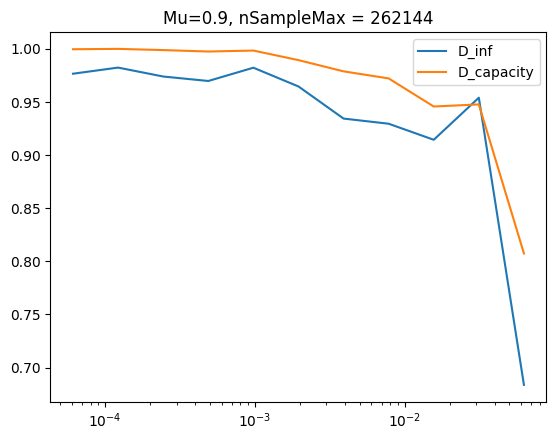

In [24]:
PlotDimensionEstimates(0.9)

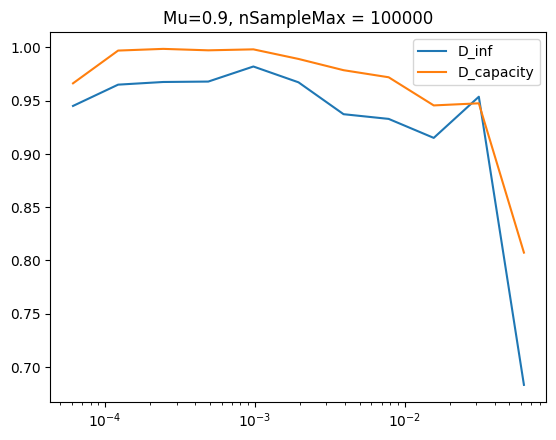

In [25]:
PlotDimensionEstimates(0.9, nSampleMax = 100000)

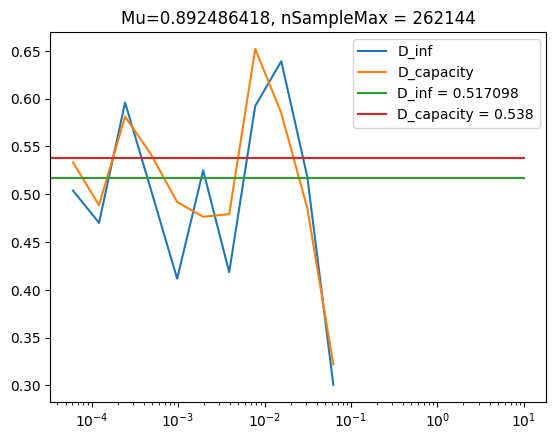

In [26]:
PlotDimensionEstimates(0.892486418,plot=True)

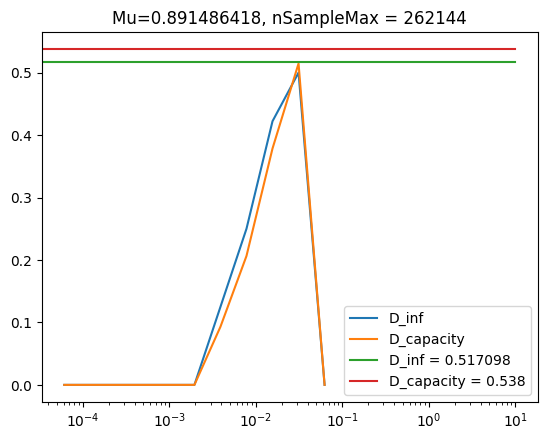

In [27]:
PlotDimensionEstimates(0.892486418- 0.001, plot=True)

# 5.D Invariant measures
In chaotic dynamical systems with dissipation and forcing, the long-time behavior lies on an attractor: points off of the attractor do not contribute to the time-average behavior, and points on the attractor are weighted by an invariant measure or probability density in state space.

In this problem we explore the invariant measure for the logistic map, which goes chaotic through a period doubling cascade. The chaotic region of this map exhibits a complex, textured structure with a series of sharp internal boundaries. In this exercise, we attempt to understand this structure.



#### Exercise 5.10: Fixed points.
 Attracting  fixed point. For small $\mu$, our mapping has an attracting  fixed-point. A  fixed-point of a mapping is a value $x^*  = f(x^*)$; a fixed-point is stable if small perturbations shrink after iterating:
$$|f(x^*+\epsilon)-^*| \simeq |f'(x^*)|\epsilon <\epsilon$$
if the derivative $|f'(x^*)|$<1.

Set   $\mu= 0.2$, iterate $f$ for some initial
points $0 < x_0 < 1$ of your choosing, and convince yourself that they are all attracted to zero. Plot $f$ and the diagonal $y = x$ on the same plot. Are there any  foxed-points other than $x = 0$? Repeat for
  $\mu= 0.4$, and $\mu=0.6$. What happens?

In [28]:
def FindFixedPoint(mu, N):
  x0_values = np.linspace(0.01, 0.99)
  attractors = []
  for x0 in x0_values:
    attractor = IterateList(f, x0, N, mu)[-1]
    if len(attractors) == 0 or abs(attractor - attractors[-1]) > 1e-6:
      attractors.append(attractor)
  pylab.plot(x0_values, f(x0_values, mu), 'k')
  pylab.plot(x0_values, x0_values)
  for attractor in attractors:
    pylab.plot(attractor, f(attractor, mu), 'o')
  pylab.xlabel('x0')
  pylab.ylabel('Attractor')
  pylab.title(r'Attractors for $\mu = $'f'{mu}')
  pylab.show()
  return attractors

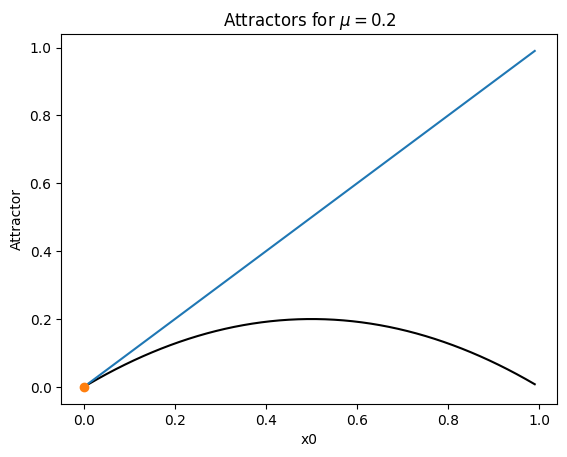

Fixed Points:  [1.4641766251744666e-99]


In [29]:
fixed = FindFixedPoint(0.2,1000)
print("Fixed Points: ", fixed)

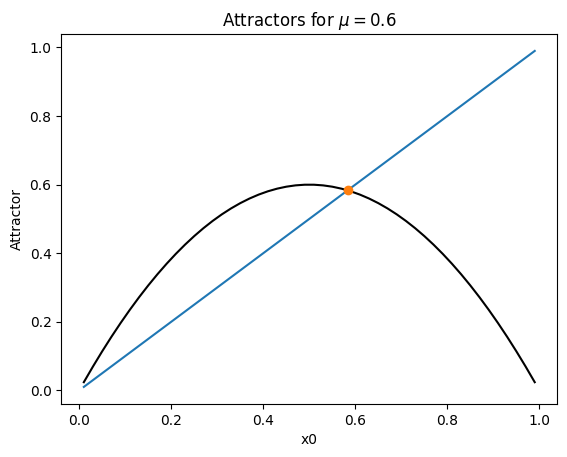

Fixed Points:  [0.5833333333333333]


In [30]:
fixed = FindFixedPoint(0.6,1000)
print("Fixed Points: ", fixed)

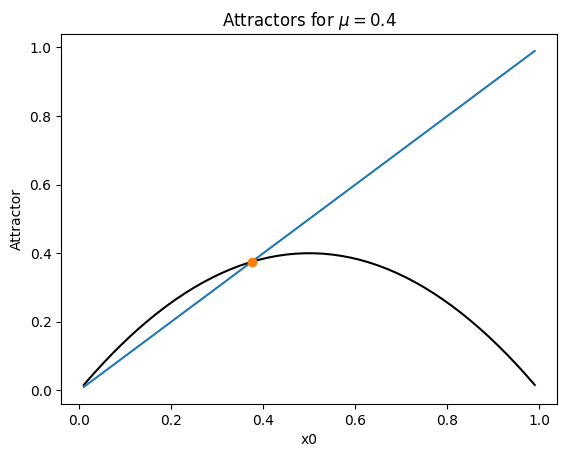

Fixed Points:  [0.37500000000000006]


In [31]:
fixed = FindFixedPoint(0.4,1000)
print("Fixed Points: ", fixed)

#### Exercise 5.11: Invariant density.
The invariant density  $\rho(x) dx$
is the probability that a point on a long trajectory will lie between $x$ and $x + dx$. To  find it numerically, we iterate a typical point $x_0$ a thousand or so times ($N_{transient}$) to  find a point $x_a$ on the attractor, and then collect a long trajectory of perhaps a million points ($N_{cycles}$).
A histogram of this trajectory gives  $\rho(x)$. Averaging over this density
is manifestly the same as a time average over the trajectory of a million points. We call  $\rho(x)$ invariant because it is left the same under the mapping f; iterating our million-point approximation for  once under $f$ only removes the first point $x_a$ and adds one extra point to the end.

Set  $\mu= 1$, iterate $f$ many times, and form a histogram of values giving the density  $\rho(x)$ of points along the trajectory. You should find that points $x$ near the boundaries are approached more often than points near the center.
Using the fact that the long-time average
 $\rho(x)$ must be independent of time, one can show that for $\mu= 1$ that density of points is $$\rho(x) = \frac{1}{\pi\sqrt{x(1-x)}}$$.

Plot this theoretical curve with your numerical histogram.


In [32]:
def rho(x):
  return 1/(np.pi*np.sqrt(x*(1-x)))

In [33]:
x0 = random.random()
nTransient = 1000
mu=1
nCycles = int(10e6)
attractor = IterateList(f, x0, nTransient, mu)[-1]
traj = IterateList(f, attractor, nCycles, mu)

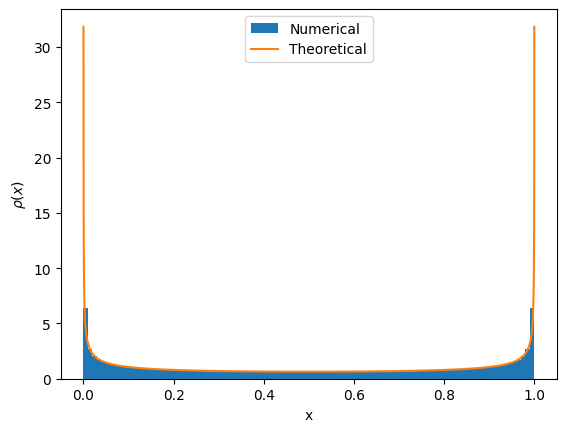

In [34]:
pylab.hist(traj, bins=100, density=True,label='Numerical')
x=np.linspace(0.0001,1-0.0001,len(traj))
pylab.plot(x,rho(x),label='Theoretical')
pylab.xlabel('x')
pylab.ylabel(r'$\rho(x)$')
pylab.legend()
pylab.show()

#### Exercise 5.12. Cusps in the invariant density
At values of  slightly smaller than one, our mapping has a rather complex invariant density.
Find the invariant density
for   $\mu= 0.9$. Make your trajectory length Ncycles big enough and the bin size small enough to see the interesting structures. Notice that the attractor
no longer folls the whole range $(0, 1)$, locate roughly where the edges are. Notice also the cusps in  $\rho(x)$ at the edges of the attractor, and also at places inside
the attractor (called boundaries). Locate
some of the more prominent cusps.

In [35]:
from scipy.signal import find_peaks, peak_widths

In [36]:
def PlotInvariantDensityWithBoundaries(g, x0, num_boundaries,
                                       mu, xMax=0.5, ret_cusps=False, print_prev_cusps = [None]):
    """Plots the invariant density, together with the first num_boundaries
    iterates of xMax = 0.5 (which should coincide with folds, and hence
    cusps, in the invariant density). Plots the iterates f^[n](xMax) as red
    circles 'ro' at rho = n."""
    attractor = IterateList(g, x0, int(10e6), mu)[-1]
    traj  = IterateList(g, attractor, 10000, mu)
    numbers, bins = np.histogram(traj, bins=100, density=True)
    peaks, properties = find_peaks(numbers, height=(0.1 * np.max(numbers), None))

    sorted_indices = np.argsort(-properties["peak_heights"])
    sorted_peak_indices = peaks[sorted_indices]
    top_peak_indices = sorted_peak_indices[:num_boundaries]

    sorted_indices2 = np.argsort(bins[top_peak_indices])
    top_peak_indices2 =  top_peak_indices[sorted_indices2]




    for i in range(len(top_peak_indices)-1):
        x = np.linspace(bins[top_peak_indices2[i]], bins[top_peak_indices2[i+1]], 100)
        y = np.linspace(numbers[top_peak_indices2[i+1]],numbers[top_peak_indices2[i+1]],100)
        pylab.plot(x, y, color='blue')

    pylab.hist(traj, bins=bins, density=True, alpha=0.5)
    bins = np.array(center_bin(bins), dtype="float64")
    pylab.plot(bins[peaks], numbers[peaks], "x", color='green', label = "All peaks")
    pylab.plot(bins[top_peak_indices], numbers[top_peak_indices], "x", color='blue', label= f"Top {num_boundaries} peaks")

    rhos = IterateList(g, xMax, num_boundaries, mu)
    y = [11 for i in range(num_boundaries)]
    pylab.scatter(rhos,y, color='red', label=f"Rho: {num_boundaries} Iterates of xMax: {xMax}")

    if ret_cusps:
      return top_peak_indices
    if any(print_prev_cusps) != None:
      pylab.plot(bins[print_prev_cusps], numbers[print_prev_cusps], ".", color='yellow', label= f"Previous example cusps")



    pylab.xlabel('Bins')
    pylab.ylabel('Frequency')
    pylab.legend()
    pylab.title('Histogram with Significant Peaks Detected')
    pylab.show()

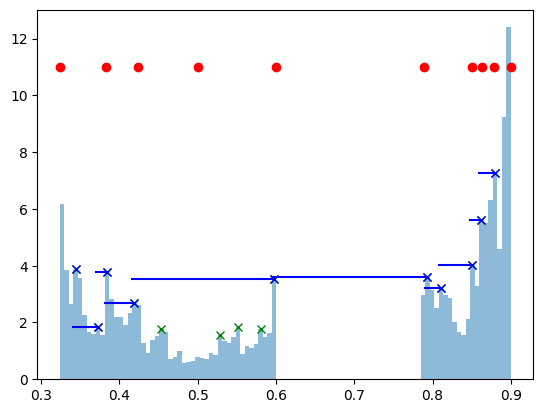

In [37]:
cusps = PlotInvariantDensityWithBoundaries(f, 0.1, 10,
                                       0.9, xMax=0.5,ret_cusps=True)

#### Exercise 5.13
Set  $\mu= 0.9$ and calculate $f(1/2)$, $f(f(1/2))$, ... and compare these iterates to the locations of the edges and cusps from exercise 5.12. (You may wish to include
them both on the same plot.)

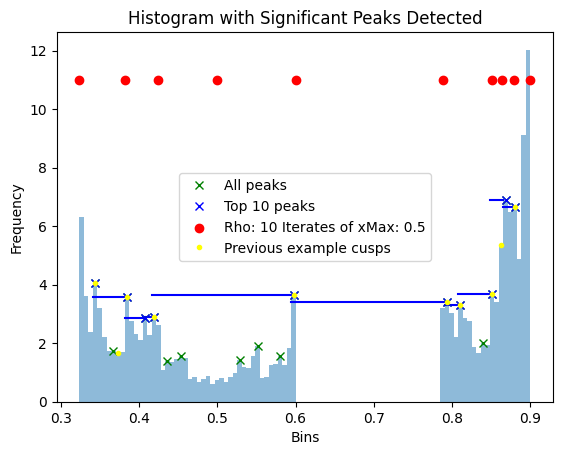

In [38]:
PlotInvariantDensityWithBoundaries(f, 0.5, 10,
                                       0.9, xMax=0.5, print_prev_cusps= cusps)

#### Exercise 5.14. Bifurcation diagram

Plot the attractor (reproducing the figure below) as a function of $\mu$, for $0.8 < $\mu$ <1$:
- Pick regularly-spaced $\delta\mu$
- run $N_{transient}$ steps
- record $N_{cycles}$ steps
- plot.

You should be able to push $N_{transient}$
and $N_{cycles}$  both larger than 100, and    $\delta\mu< 0.01$.

On the same plot, for the same $\mu$, plot the  first eight images of $x = 1/2$, that is, $f(1/2)$; $f(f(1/2))$;....

Are the boundaries you see just the cusps? What
happens in the bifurcation diagram when two boundaries touch?


![image.png](attachment:cb9bf9cb-75f0-4594-8d87-edfca1e2f5f3.png)

In [39]:
def PlotBoundaries(f, nTransient, nCycle, mus, xMax=0.5):
    """
    For each parameter value eta in etaArray,
    iterate the point xMax nCycle times, and plot the result
    (not including xMax) versus eta. We recommend using
       pylab.plot(etas, halfImages, 'ro')
    where the 'ro' will draw red circles.

    Usually xMax will be the peak in the function g (as hinted at by
    its name).

    This can be used in conjunction with BifurcationDiagram to explain
    the boundary structure in the chaotic region. If you remove
    pylab.show() from BifurcationDiagram, this plot will be
    superimposed on the other.
    """

    trajs = np.zeros((len(mus),nCycle))
    trajs_12 = np.zeros((len(mus),8))
    for i,mu in enumerate(mus):
      attractorX = IterateList(f, xMax, nTransient, mu)[-1]
      traj = IterateList(f, attractorX, nCycle, mu)
      traj_12 = IterateList(f, xMax, 8, mu)
      trajs[i,:] = traj
      trajs_12[i,:] = traj_12
    for i in range(nCycle):
      pylab.scatter(mus, trajs[:,i],color="black", s=0.005)

    for i in range(8):
      pylab.plot(mus, trajs_12[:,i],color="red", linewidth=1, alpha=1)


    pylab.xlabel(r'$\mu$')
    pylab.ylabel(r'$f^{n}(1/2)$')
    pylab.show()


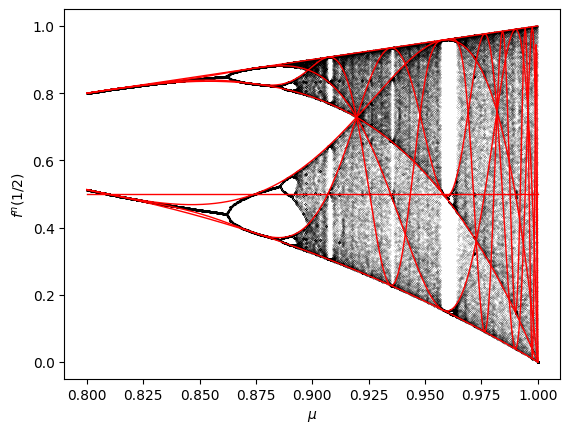

In [40]:
mus = np.linspace(0.8,1,500)
nCycle=300
nTransient=400
PlotBoundaries(f, nTransient,nCycle, mus, xMax=0.5)

The iterations at xMax follow the boundaries of the bifurcation diagram, which are the most followed paths by the trajectories (the bins with the greatest frequency, the cusps).

When two boundaries touch in a bifurcation diagram, the trajectory starting from xMax goes to the point for the given mu for which the boundaries are touching.